In [1]:
#Importing essentail libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv('CICIDS2017_FINAL.csv')

# Spliting the data into features (X) and target (y)
X = data.drop(columns=[' Label', 'Ground_Label'])
y = data['Ground_Label']

# Handling the missing or infinite values in X
X = X.fillna(X.mean())
X.replace([float('inf'), float('-inf')], 0, inplace=True) # Replace NaN with column mean and infinity with 0

#  Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  training the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# to make predictions on the test set
y_pred = clf.predict(X_test)

#Evaluate the model's performance by accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# to print a classification report for precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9983

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151938
           1       1.00      1.00      1.00     25585
           2       1.00      1.00      1.00     31757
           3       0.69      0.69      0.69       435

    accuracy                           1.00    209715
   macro avg       0.92      0.92      0.92    209715
weighted avg       1.00      1.00      1.00    209715



In [2]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# implementing SMOTE which helps to balance the class distribution of the dataset,which can improve the performance of machine learning models.

Accuracy: 0.9983


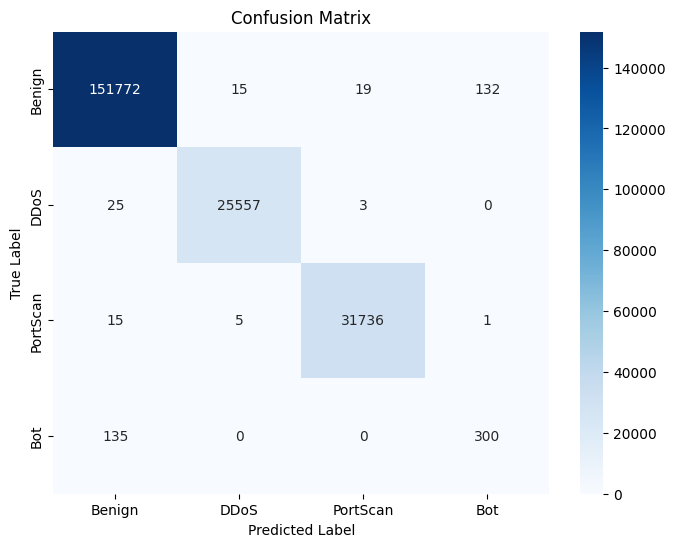

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    151938
        DDoS       1.00      1.00      1.00     25585
    PortScan       1.00      1.00      1.00     31757
         Bot       0.69      0.69      0.69       435

    accuracy                           1.00    209715
   macro avg       0.92      0.92      0.92    209715
weighted avg       1.00      1.00      1.00    209715



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset
df = pd.read_csv("CICIDS2017_FINAL.csv")
X = df.drop(columns=['Ground_Label', ' Label'])  # Feature columns
y = df['Ground_Label']  # Target variable

# Again to handle missing or infinite values in X
X = X.fillna(X.mean())# Replace NaN with column mean and infinity with 0
X.replace([float('inf'), float('-inf')], 0, inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)

# To make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance by accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'DDoS', 'PortScan', 'Bot'], 
            yticklabels=['Benign', 'DDoS', 'PortScan', 'Bot'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'DDoS', 'PortScan', 'Bot'])
print("Classification Report:")
print(class_report)


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer


# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# 5-fold cross-validation and to return the scores (accuracy)
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

# to Print the cross-validation scores for each fold
print("Cross-validation scores: ", cv_scores)

# Calculating the mean and standard deviation of the accuracy scores
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation of accuracy: ", cv_scores.std())


Cross-validation scores:  [0.97316358 0.99568939 0.99193191 0.99796867 0.98981475]
Mean accuracy:  0.9897136590134231
Standard deviation of accuracy:  0.008748606309793516
